In [1]:
from sklearn import datasets # donnees
import os # rep de travail
import pandas as pd # data analysis
from scipy import stats # stat desc
import matplotlib.pyplot as plt # graphiques
import numpy as np # maths
import seaborn as sns

pd.set_option('display.max_columns', 1000,'display.max_rows', 1000)




PATH = "data_academic_performance.xlsx"

donnees = pd.read_excel(PATH)

# **Présentation des données :**

**Data of Academic Performance evolution for Engineering Students**

Le jeu de données a été collecté lors d'une étude sur l'enseignement supérieur Colombien.

Il peut être utile pour faire de nombreuses études sociales, les plus évidentes pouvant être le rôle du contexte familial, économique, éducatif ou du genre sur les performances ou la réussite scolaire.

Il peut également permettre de mieux comprendre les liens entre les différentes matières et l'environnement afin de prédire la réussite future des élèves.

Ici, le but de notre tâche d'apprentissage sera de prédire la note d'un élève en fonction de plusieurs attributs. On pourra faire plusieurs versions utilisant ou non certains attributs.

    :Number of Instances: 12,411

    :Number of Attributes: 44 (including target)

    :Number of Numerical Attributes: 18 (including target)

    :Number of Categorical Attributes: 26

    :Numerical Attributes Information:

        TARGET

        - G_SC         Global Score

        SECONDARY GRADES

        - MAT_S11     Mathematics
        - CR_S11      Critical Reading
        - CC_S11      Citizen Competencies S11
        - BIO_S11     Biology
        - ENG_S11     English

        HIGHER EDUCATION GRADES

        - QR_PRO      Quantitative Reasoning
        - CR_PRO      Critical Reading
        - CC_PRO      Citizen Competencies SPRO
        - ENG_PRO     English
        - WC_PRO      Written Communication
        - FEP_PRO     Formulation of Engineering Projects

        - PERCENTILE   Percentile
        - 2ND_DECILE   Second Decile
        - QUARTILE     Quartile

        - SEL          Socioeconomic Level
        - SEL_IHE      Socioeconomic Level of The Institution of Higher Education

    :Categorial Attributes Information:

        - GENDER            Gender   (2)

        - EDU_FATHER        Father's education   (12)
        - EDU_MOTHER        Mother's education   (12)
        - OCC_FATHER        Father's occupation   (13)
        - OCC_MOTHER        Mother's occupation   (13)

        - STRATUM           Stratum (Class : higher => richer)  (7)
        - SISBEN            Sisben (Welfare : lower => greater support)   (6)
        - PEOPLE_HOUSE      People in the house   (13)

        - INTERNET          Internet   (2)
        - TV                TV    (2)
        - COMPUTER          Computer   (2)
        - WASHING_MCH       Washing machine   (2)
        - MIC_OVEN          Microwave oven   (2)
        - CAR               Car   (2)
        - DVD               DVD   (2)
        - FRESH             Fresh (Fridge ?)   (2)
        - PHONE             Phone   (2)
        - MOBILE            Mobile   (2)

        - REVENUE           Revenue   (3)
        - JOB               Job    (8)

        - SCHOOL_NAME       School name    (3735)
        - SCHOOL_NAT        Nature of School    (2)
        - SCHOOL_TYPE       Type of School    (4)
        - COD_SPRO          ID of the student (higher education)   (12411)
        - UNIVERSITY        University    (2)
        - ACADEMIC_PROGRAM  Academic Program    (2)
        - COD_S11           ID of the student (secondary)   (12411)

    :Missing Attribute Values: None

This dataset was obtained from the Mendeley repository.
https://data.mendeley.com/datasets/83tcx8psxv/1

The target variable is the global score of a student, calculated from some of its other scores. We don't know which ones, nor we know the formula.

This data article presents data on the results in national assessments for secondary and university education in engineering students.
The data contains academic, social, economic information for 12,411 students.
The data were obtained by orderly crossing the databases of the Colombian Institute for the Evaluation of Education (ICFES).
The data are part of the Master's Degree in Engineering project of the Technological University of Bolívar (UTB)
titled Academic Efficiency Analysis in Engineering students. Developed by Professor Enrique De La Hoz and engineer Rohemi Zuluaga.

.. topic:: References

    - De La Hoz, Enrique (2020), “Data of Academic Performance evolution for Engineering Students”, Mendeley Data, V1, doi: 10.17632/83tcx8psxv.1

### Visualisation des données :

In [2]:
print(donnees.head())

            COD_S11 GENDER                         EDU_FATHER  \
0  SB11201210000129      F  Incomplete Professional Education   
1  SB11201210000137      F                 Complete Secundary   
2  SB11201210005154      M                           Not sure   
3  SB11201210007504      F                           Not sure   
4  SB11201210007548      M    Complete professional education   

                         EDU_MOTHER                                OCC_FATHER  \
0  Complete technique or technology  Technical or professional level employee   
1   Complete professional education                             Entrepreneur    
2                          Not sure                               Independent   
3                          Not sure                          Other occupation   
4   Complete professional education                                 Executive   

                 OCC_MOTHER    STRATUM                              SISBEN  \
0                      Home  Stratum 4  It i

On peut voir que les matières diffèrent dans leur moyenne et leur écart-type. on peut aussi voir par exemple qu'il y a toujours une note maximale à 100.

On peut voir nombre d'informations intéressantes, même avant one-hot encoding :

- Le nombre de personnes à la maison est faiblement corrélé au résultats scolaires, mais reste néanmoins toujours corrélé négativement.

- Les matières exigent plus ou moins compétences communes avec d'autres.

- Le niveau socio-économique est fortement corrélé aux résultats, excepté pour "Formulation of Engineering Projects"

# **Pré-traitement**

### Suppression des colonnes non souhaitées :

In [3]:
numerical_attribute = ["MAT_S11",
                       "CR_S11",
                       "CC_S11",
                       "BIO_S11",
                       "ENG_S11",
                       "QR_PRO",
                       "CR_PRO",
                       "CC_PRO",
                       "ENG_PRO",
                       "WC_PRO",
                       "FEP_PRO",
                       "G_SC",
                       "PERCENTILE",
                       "2ND_DECILE",
                       "QUARTILE",
                       "SEL",
                       "SEL_IHE",
                       "PEOPLE_HOUSE"]

categorical_attributes = ["GENDER",
                          "EDU_FATHER",
                          "EDU_MOTHER",
                          "OCC_FATHER",
                          "OCC_MOTHER",
                          "STRATUM",
                          "SISBEN",
                          "INTERNET",
                          "TV",
                          "COMPUTER",
                          "WASHING_MCH",
                          "MIC_OVEN",
                          "CAR",
                          "DVD",
                          "FRESH",
                          "PHONE",
                          "MOBILE",
                          "REVENUE",
                          "JOB",
                          "SCHOOL_NAT",
                          "SCHOOL_TYPE",
                          "ACADEMIC_PROGRAM",
                          #"COD_S11",
                          #"Cod_SPro",
                          #"UNIVERSITY", # ( On drop University et School_name dans un premier temps pour ne pas avoir trop de variables explicatives )
                          #"SCHOOL_NAME"
                         ]

#Suppression des colonnes non souhaitées
for column in donnees :
    if column not in numerical_attribute and column not in categorical_attributes :
        donnees.pop(column)

### Conversion de la colonne PEOPLE_HOUSE en type numérique :

In [4]:
#Conversion de la colonne PEOPLE_HOUSE du type objet au type entier (Nous faisons ici le choix de convertir 'Twelve or more' en 12)
people_house_translate = {'Three': 3,
                          'Five': 5,
                          'One': 1,
                          'Four': 4,
                          'Six': 6,
                          'Two': 2,
                          'Twelve or more': 12,
                          'Nueve': 9,
                          'Eight': 8,
                          'Seven': 7,
                          'Ten': 10,
                          'Once': 1,
                          0: 0}
donnees["PEOPLE_HOUSE"] = donnees["PEOPLE_HOUSE"].map(people_house_translate)

# **Analyse statistique :**

In [5]:
display(donnees.describe().round(2))

,PEOPLE_HOUSE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
count,12411.00,12411.00,12411.00,12411.00,12411.00,12411.0,12411.00,12411.00,12411.00,12411.0,12411.0,12411.00,12411.00,12411.00,12411.00,12411.00,12411.00,12411.00
mean,4.33,64.32,60.78,60.71,63.95,61.8,77.42,62.20,59.19,67.5,53.7,145.48,162.71,68.45,3.89,3.19,2.60,2.41
std,1.36,11.87,10.03,10.12,11.16,14.3,22.67,27.67,28.99,25.5,30.0,40.13,23.11,25.87,1.25,0.98,1.11,0.93
min,0.00,26.00,24.00,0.00,11.00,26.0,1.00,1.00,1.00,1.0,0.0,1.00,37.00,1.00,1.00,1.00,1.00,1.00
25%,4.00,56.00,54.00,54.00,56.00,50.0,65.00,42.00,36.00,51.0,28.0,124.00,147.00,51.00,3.00,3.00,2.00,2.00
50%,4.00,64.00,61.00,60.00,64.00,59.0,85.00,67.00,65.00,74.0,56.0,153.00,163.00,75.00,4.00,4.00,2.00,2.00
75%,5.00,72.00,67.00,67.00,71.00,72.0,96.00,86.00,85.00,88.0,80.0,174.00,179.00,90.00,5.00,4.00,4.00,3.00
max,12.00,100.00,100.00,100.00,100.00,100.0,100.00,100.00,100.00,100.0,100.0,300.00,247.00,100.00,5.00,4.00,4.00,4.00


# **Corrélations :**

In [6]:
display(donnees.corr(numeric_only = True))

,PEOPLE_HOUSE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
PEOPLE_HOUSE,1.000000,-0.050993,-0.048262,-0.047122,-0.047839,-0.097952,-0.026488,-0.031631,-0.045949,-0.096531,-0.025307,-0.017980,-0.063416,-0.059560,-0.054499,-0.056549,-0.138320,-0.091897
MAT_S11,-0.050993,1.000000,0.609894,0.594732,0.763082,0.594903,0.615621,0.523993,0.458287,0.545888,0.207195,0.261243,0.643838,0.613202,0.575242,0.561125,0.230067,0.301120
CR_S11,-0.048262,0.609894,1.000000,0.731217,0.661651,0.581045,0.520551,0.589139,0.515558,0.549311,0.228595,0.286429,0.653572,0.633823,0.599640,0.584281,0.187746,0.267731
CC_S11,-0.047122,0.594732,0.731217,1.000000,0.657576,0.548531,0.503067,0.567081,0.524206,0.511280,0.220435,0.287582,0.634900,0.613032,0.577738,0.567217,0.171626,0.256775
BIO_S11,-0.047839,0.763082,0.661651,0.657576,1.000000,0.593273,0.601655,0.564998,0.500017,0.558352,0.217898,0.291091,0.666635,0.642521,0.606477,0.593301,0.199416,0.275563
ENG_S11,-0.097952,0.594903,0.581045,0.548531,0.593273,1.000000,0.445130,0.501599,0.433447,0.738294,0.256144,0.250734,0.662169,0.615464,0.570983,0.554559,0.394137,0.456649
QR_PRO,-0.026488,0.615621,0.520551,0.503067,0.601655,0.445130,1.000000,0.570196,0.460823,0.503816,0.199595,0.253292,0.699914,0.723865,0.703822,0.693417,0.159939,0.243903
CR_PRO,-0.031631,0.523993,0.589139,0.567081,0.564998,0.501599,0.570196,1.000000,0.607908,0.527087,0.248994,0.330744,0.786409,0.791534,0.761176,0.745124,0.164093,0.228774
CC_PRO,-0.045949,0.458287,0.515558,0.524206,0.500017,0.433447,0.460823,0.607908,1.000000,0.477633,0.238128,0.351156,0.757822,0.755583,0.723866,0.709715,0.172549,0.219626
ENG_PRO,-0.096531,0.545888,0.549311,0.511280,0.558352,0.738294,0.503816,0.527087,0.477633,1.000000,0.252745,0.261248,0.724643,0.728411,0.701317,0.689325,0.357770,0.422678


### One-hot encoding :

In [7]:
donnees_hot = pd.get_dummies(donnees, columns=categorical_attributes, prefix=categorical_attributes)

# On supprimme les colonnes redondantes pour les variables binaires
for col in categorical_attributes:
    if len(donnees[col].unique()) == 2:
        first_col = f"{col}_{donnees[col].unique()[0]}"
        donnees_hot = donnees_hot.drop(columns=first_col)
donnees = donnees_hot

# Analyse statistique après one-hot encoding *(difficilement lisible)* :

In [8]:
display(donnees.describe().round(2))

,PEOPLE_HOUSE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE
count,12411.00,12411.00,12411.00,12411.00,12411.00,12411.0,12411.00,12411.00,12411.00,12411.0,12411.0,12411.00,12411.00,12411.00,12411.00,12411.00,12411.00,12411.00
mean,4.33,64.32,60.78,60.71,63.95,61.8,77.42,62.20,59.19,67.5,53.7,145.48,162.71,68.45,3.89,3.19,2.60,2.41
std,1.36,11.87,10.03,10.12,11.16,14.3,22.67,27.67,28.99,25.5,30.0,40.13,23.11,25.87,1.25,0.98,1.11,0.93
min,0.00,26.00,24.00,0.00,11.00,26.0,1.00,1.00,1.00,1.0,0.0,1.00,37.00,1.00,1.00,1.00,1.00,1.00
25%,4.00,56.00,54.00,54.00,56.00,50.0,65.00,42.00,36.00,51.0,28.0,124.00,147.00,51.00,3.00,3.00,2.00,2.00
50%,4.00,64.00,61.00,60.00,64.00,59.0,85.00,67.00,65.00,74.0,56.0,153.00,163.00,75.00,4.00,4.00,2.00,2.00
75%,5.00,72.00,67.00,67.00,71.00,72.0,96.00,86.00,85.00,88.0,80.0,174.00,179.00,90.00,5.00,4.00,4.00,3.00
max,12.00,100.00,100.00,100.00,100.00,100.0,100.00,100.00,100.00,100.0,100.0,300.00,247.00,100.00,5.00,4.00,4.00,4.00


# Corrélations après one-hot encoding *(difficilement lisible)* :

In [9]:
display(donnees.corr(numeric_only = True))

,PEOPLE_HOUSE,MAT_S11,CR_S11,CC_S11,BIO_S11,ENG_S11,QR_PRO,CR_PRO,CC_PRO,ENG_PRO,WC_PRO,FEP_PRO,G_SC,PERCENTILE,2ND_DECILE,QUARTILE,SEL,SEL_IHE,GENDER_M,EDU_FATHER_0,EDU_FATHER_Complete Secundary,EDU_FATHER_Complete primary,EDU_FATHER_Complete professional education,EDU_FATHER_Complete technique or technology,EDU_FATHER_Incomplete Professional Education,EDU_FATHER_Incomplete Secundary,EDU_FATHER_Incomplete primary,EDU_FATHER_Incomplete technical or technological,EDU_FATHER_Ninguno,EDU_FATHER_Not sure,EDU_FATHER_Postgraduate education,EDU_MOTHER_0,EDU_MOTHER_Complete Secundary,EDU_MOTHER_Complete primary,EDU_MOTHER_Complete professional education,EDU_MOTHER_Complete technique or technology,EDU_MOTHER_Incomplete Professional Education,EDU_MOTHER_Incomplete Secundary,EDU_MOTHER_Incomplete primary,EDU_MOTHER_Incomplete technical or technological,EDU_MOTHER_Ninguno,EDU_MOTHER_Not sure,EDU_MOTHER_Postgraduate education,OCC_FATHER_0,OCC_FATHER_Auxiliary or Administrative,OCC_FATHER_Entrepreneur,OCC_FATHER_Executive,OCC_FATHER_Home,OCC_FATHER_Independent,OCC_FATHER_Independent professional,OCC_FATHER_Operator,OCC_FATHER_Other occupation,OCC_FATHER_Retired,OCC_FATHER_Small entrepreneur,OCC_FATHER_Technical or professional level employee,OCC_MOTHER_0,OCC_MOTHER_Auxiliary or Administrative,OCC_MOTHER_Entrepreneur,OCC_MOTHER_Executive,OCC_MOTHER_Home,OCC_MOTHER_Independent,OCC_MOTHER_Independent professional,OCC_MOTHER_Operator,OCC_MOTHER_Other occupation,OCC_MOTHER_Retired,OCC_MOTHER_Small entrepreneur,OCC_MOTHER_Technical or professional level employee,STRATUM_0,STRATUM_Stratum 1,STRATUM_Stratum 2,STRATUM_Stratum 3,STRATUM_Stratum 4,STRATUM_Stratum 5,STRATUM_Stratum 6,SISBEN_0,SISBEN_Esta clasificada en otro Level del SISBEN,SISBEN_It is not classified by the SISBEN,SISBEN_Level 1,SISBEN_Level 2,SISBEN_Level 3,INTERNET_No,TV_No,COMPUTER_No,WASHING_MCH_No,MIC_OVEN_Yes,CAR_Yes,DVD_No,FRESH_No,PHONE_No,MOBILE_No,REVENUE_0,REVENUE_10 or more LMMW,REVENUE_Between 1 and less than 2 LMMW,REVENUE_Between 2 and less than 3 LMMW,REVENUE_Between 3 and less than 5 LMMW,REVENUE_Between 5 and less than 7 LMMW,REVENUE_Between 7 and less than 10 LMMW,REVENUE_less than 1 LMMW,JOB_0,JOB_No,"JOB_Yes, 20 hours or more per week","JOB_Yes, less than 20 hours per week",SCHOOL_NAT_PUBLIC,SCHOOL_TYPE_ACADEMIC,SCHOOL_TYPE_Not apply,SCHOOL_TYPE_TECHNICAL,SCHOOL_TYPE_TECHNICAL/ACADEMIC,ACADEMIC_PROGRAM_AERONAUTICAL ENGINEERING,ACADEMIC_PROGRAM_AUTOMATION ENGINEERING,ACADEMIC_PROGRAM_CATASTRAL ENGINEERING AND GEODESY,ACADEMIC_PROGRAM_CHEMICAL ENGINEERING,ACADEMIC_PROGRAM_CIVIL CONSTRUCTIONS,ACADEMIC_PROGRAM_CIVIL ENGINEERING,ACADEMIC_PROGRAM_CONTROL ENGINEERING,ACADEMIC_PROGRAM_ELECTRIC ENGINEERING,ACADEMIC_PROGRAM_ELECTRIC ENGINEERING AND TELECOMMUNICATIONS,ACADEMIC_PROGRAM_ELECTROMECHANICAL ENGINEERING,ACADEMIC_PROGRAM_ELECTRONIC ENGINEERING,ACADEMIC_PROGRAM_INDUSTRIAL AUTOMATIC ENGINEERING,ACADEMIC_PROGRAM_INDUSTRIAL CONTROL AND AUTOMATION ENGINEERING,ACADEMIC_PROGRAM_INDUSTRIAL ENGINEERING,ACADEMIC_PROGRAM_MECHANICAL ENGINEERING,ACADEMIC_PROGRAM_MECHATRONICS ENGINEERING,ACADEMIC_PROGRAM_PRODUCTION ENGINEERING,ACADEMIC_PROGRAM_PRODUCTIVITY AND QUALITY ENGINEERING,ACADEMIC_PROGRAM_TEXTILE ENGINEERING,ACADEMIC_PROGRAM_TOPOGRAPHIC ENGINEERY,ACADEMIC_PROGRAM_TRANSPORTATION AND ROAD ENGINEERING
PEOPLE_HOUSE,1.000000,-0.050993,-0.048262,-0.047122,-0.047839,-0.097952,-0.026488,-0.031631,-0.045949,-0.096531,-0.025307,-0.017980,-0.063416,-0.059560,-0.054499,-0.056549,-0.138320,-0.091897,0.003261,-0.037834,0.030577,0.040912,-0.058036,0.015515,0.009857,0.038450,0.038149,0.006648,-0.001284,-0.031530,-0.046145,-0.041044,0.047181,0.046121,-0.067793,-0.009999,-0.000858,0.058209,0.045065,0.003874,0.002155,-0.000212,-0.064567,-0.055231,0.008187,-0.023235,-0.031450,0.001408,0.062788,-0.013743,0.041396,-0.015875,-0.017434,-0.006934,-0.001765,-0.063499,-0.011543,-0.005562,-0.038266,0.122714,-0.002561,-0.035415,-0.003181,-0.000584,-0.047303,-0.006551,-0.056877,-0.082138,0.089889,0.0

# **Graphiques**

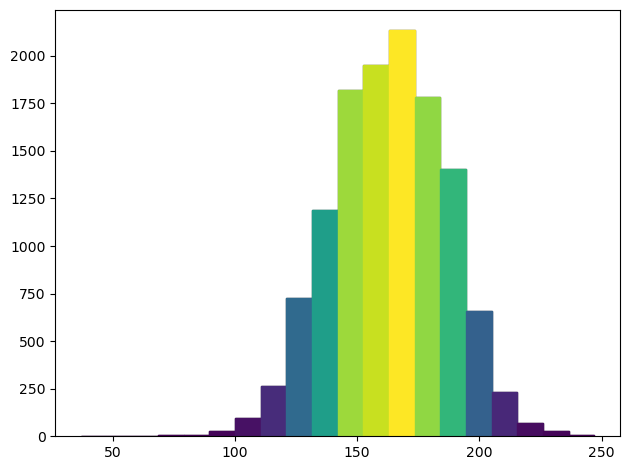

In [10]:
#Graphique 1

fig_global_score, ax_gs = plt.subplots(tight_layout=True)
hist, edges, _ = ax_gs.hist(donnees["G_SC"], bins=20, alpha=0.7,edgecolor='black')

# Echelle de couleurs
colors = plt.cm.viridis(hist / max(hist))

for i, bar in enumerate(hist):
    ax_gs.add_patch(plt.Rectangle((edges[i], 0), edges[i + 1] - edges[i], bar, color=colors[i]))

Les notes décrivent une courbe de Gauss et sont notablement généreuses.

Elles vont de 0 à 247.

C:\Users\gohier\AppData\Local\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:6854: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


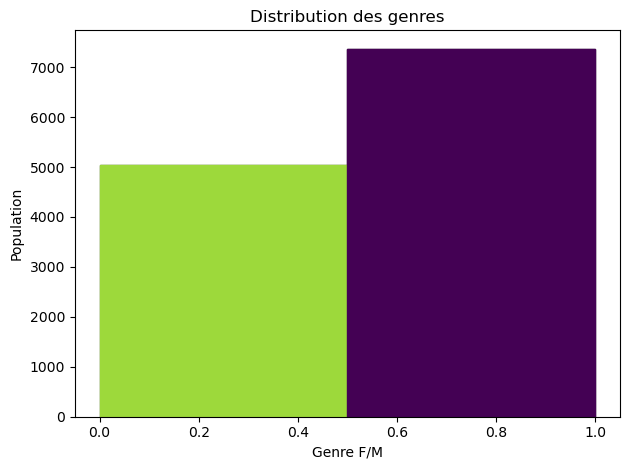

In [11]:
#Graphique 2

ax_gs.set_title("Distribution des scores globaux")
ax_gs.set_xlabel("Scores globaux")
ax_gs.set_ylabel("Population")

fig_gender, ax_gender = plt.subplots(tight_layout=True)
hist, edges, _ = ax_gender.hist(donnees["GENDER_M"], bins=[0,0.5,1], alpha=0.7, color='blue', edgecolor='black')
ax_gender.set_title("Distribution des genres")
ax_gender.set_xlabel("Genre F/M")
ax_gender.set_ylabel("Population")

for i, bar in enumerate(hist):
    ax_gender.add_patch(plt.Rectangle((edges[i], 0), edges[i + 1] - edges[i], bar, color=colors[10-10*i]))

Il y a 40% de femmes et 60% d'hommes.

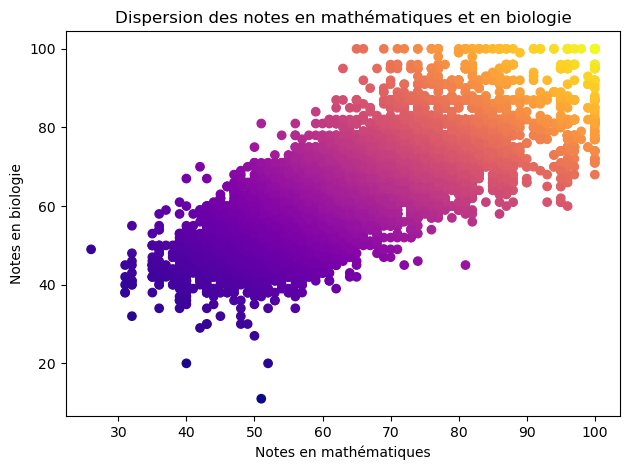

In [12]:
#Graphique 3

fig_scatter, ax_scatter = plt.subplots(tight_layout=True)
scatter = ax_scatter.scatter(donnees["MAT_S11"], donnees["BIO_S11"], c=donnees["BIO_S11"]*donnees["MAT_S11"], cmap='plasma')
ax_scatter.set_title("Dispersion des notes en mathématiques et en biologie")
ax_scatter.set_xlabel("Notes en mathématiques")
ax_scatter.set_ylabel("Notes en biologie")


plt.show()



Les notes sont meilleures en Mathématiques qu'en biologie.

Il y a une forte corrélation entre les deux.

# **Métrique d'évaluation**

Le dataset est suffisament riche pour qu'on puisse orienter notre tâche d'apprentissage et son approche différemment par le futur, si on le juge pertinent suite à nos premières expérimentations.

De premier abord, notre objectif sera de prédire la note globale d'un élève en fonction de divers attributs. Pour cela, nous utiliserons l'**Erreur quadratique moyenne** comme métrique d'évaluation.

On pourra utiliser l'**Erreur absolue moyenne** comme métrique d’´evaluation
supplémentaire si on souhaite que notre modèle prédise mieux en moyenne mais ai des erreurs plus grossières.